Target:
* Increase model capacity by adding more convolution layers and reducing the output channels from 16 to 14. 
* Add LR scheduler

Result:
* Num parameters: 7902
* Max Train accuracy (in 15 epochs): 98.87%.
* Max test accuracy (in 15 epochs): 99.25%

Analysis:
*  Increasing model capacity has improved the accuracy but it has not yet reached the target. 

In [1]:
!git clone "https://github.com/jyanivaddi/ERA_V1.git"
!git pull

fatal: destination path 'ERA_V1' already exists and is not an empty directory.
fatal: not a git repository (or any of the parent directories): .git


Add all the imports

In [2]:
from __future__ import print_function
import sys
sys.path.append("ERA_V1/session_7")
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from s7_utils import load_mnist_data, preview_batch_images, plot_statistics
from s7_model import Model_5_Net, model_summary, model_train, model_test

Allocate GPU

In [3]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
mnist_model = Model_5_Net().to(device)
model_summary(mnist_model, input_size=(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
       BatchNorm2d-2           [-1, 10, 26, 26]              20
              ReLU-3           [-1, 10, 26, 26]               0
           Dropout-4           [-1, 10, 26, 26]               0
            Conv2d-5           [-1, 10, 24, 24]             900
       BatchNorm2d-6           [-1, 10, 24, 24]              20
              ReLU-7           [-1, 10, 24, 24]               0
           Dropout-8           [-1, 10, 24, 24]               0
            Conv2d-9           [-1, 10, 22, 22]             900
      BatchNorm2d-10           [-1, 10, 22, 22]              20
             ReLU-11           [-1, 10, 22, 22]               0
          Dropout-12           [-1, 10, 22, 22]               0
           Conv2d-13           [-1, 10, 20, 20]             900
      BatchNorm2d-14           [-1, 10,

Define Transforms

In [4]:
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    #transforms.RandomRotation([-15,15]),
    transforms.Normalize((0.1307,),(0.3081,))
])
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))
])

Download Data

In [5]:
train_data, test_data = load_mnist_data(train_transforms, test_transforms)

Define train and test loaders

In [6]:
torch.manual_seed(1)
batch_size = 128
kwargs = {'num_workers': 2, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle = True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle = True, **kwargs)

Preview data

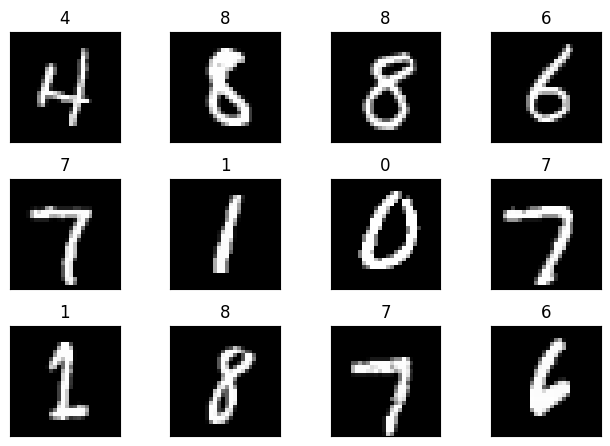

In [7]:
preview_batch_images(train_loader)

In [8]:
model = Model_5_Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=8, gamma=0.1, verbose=True)
train_losses = []
test_losses = []
train_acc = []
test_acc = []
for epoch in range(1,20):
    print(f"epoch: {epoch}")
    model_train(model, device, train_loader, optimizer, train_acc, train_losses)
    model_test(model, device, test_loader, test_acc, test_losses)
    scheduler.step()


Adjusting learning rate of group 0 to 1.0000e-02.
epoch: 1


loss=0.20315630733966827 batch_id=468 Accuracy = 88.07: 100%|██████████| 469/469 [00:18<00:00, 25.43it/s]



Test set: Average loss: 0.1220, Accuracy: 9778/10000 (97.78%)

Adjusting learning rate of group 0 to 1.0000e-02.
epoch: 2


loss=0.07188739627599716 batch_id=468 Accuracy = 97.17: 100%|██████████| 469/469 [00:18<00:00, 25.42it/s]



Test set: Average loss: 0.0741, Accuracy: 9837/10000 (98.37%)

Adjusting learning rate of group 0 to 1.0000e-02.
epoch: 3


loss=0.06823626905679703 batch_id=468 Accuracy = 97.75: 100%|██████████| 469/469 [00:18<00:00, 25.43it/s]



Test set: Average loss: 0.0574, Accuracy: 9845/10000 (98.45%)

Adjusting learning rate of group 0 to 1.0000e-02.
epoch: 4


loss=0.09808584302663803 batch_id=468 Accuracy = 98.05: 100%|██████████| 469/469 [00:17<00:00, 26.97it/s]



Test set: Average loss: 0.0472, Accuracy: 9877/10000 (98.77%)

Adjusting learning rate of group 0 to 1.0000e-02.
epoch: 5


loss=0.08481957763433456 batch_id=468 Accuracy = 98.23: 100%|██████████| 469/469 [00:17<00:00, 26.50it/s]



Test set: Average loss: 0.0430, Accuracy: 9881/10000 (98.81%)

Adjusting learning rate of group 0 to 1.0000e-02.
epoch: 6


loss=0.03360477462410927 batch_id=468 Accuracy = 98.34: 100%|██████████| 469/469 [00:16<00:00, 27.67it/s]



Test set: Average loss: 0.0398, Accuracy: 9897/10000 (98.97%)

Adjusting learning rate of group 0 to 1.0000e-02.
epoch: 7


loss=0.04039278253912926 batch_id=468 Accuracy = 98.43: 100%|██████████| 469/469 [00:17<00:00, 27.02it/s]



Test set: Average loss: 0.0418, Accuracy: 9890/10000 (98.90%)

Adjusting learning rate of group 0 to 1.0000e-02.
epoch: 8


loss=0.02977824956178665 batch_id=468 Accuracy = 98.47: 100%|██████████| 469/469 [00:18<00:00, 25.61it/s]



Test set: Average loss: 0.0308, Accuracy: 9917/10000 (99.17%)

Adjusting learning rate of group 0 to 1.0000e-03.
epoch: 9


loss=0.06698519736528397 batch_id=468 Accuracy = 98.81: 100%|██████████| 469/469 [00:17<00:00, 27.03it/s]



Test set: Average loss: 0.0298, Accuracy: 9920/10000 (99.20%)

Adjusting learning rate of group 0 to 1.0000e-03.
epoch: 10


loss=0.0971582755446434 batch_id=468 Accuracy = 98.80: 100%|██████████| 469/469 [00:18<00:00, 25.32it/s]



Test set: Average loss: 0.0284, Accuracy: 9922/10000 (99.22%)

Adjusting learning rate of group 0 to 1.0000e-03.
epoch: 11


loss=0.09695179015398026 batch_id=468 Accuracy = 98.77: 100%|██████████| 469/469 [00:17<00:00, 27.11it/s]



Test set: Average loss: 0.0273, Accuracy: 9925/10000 (99.25%)

Adjusting learning rate of group 0 to 1.0000e-03.
epoch: 12


loss=0.03607042506337166 batch_id=468 Accuracy = 98.81: 100%|██████████| 469/469 [00:19<00:00, 24.09it/s]



Test set: Average loss: 0.0267, Accuracy: 9925/10000 (99.25%)

Adjusting learning rate of group 0 to 1.0000e-03.
epoch: 13


loss=0.032566118985414505 batch_id=468 Accuracy = 98.87: 100%|██████████| 469/469 [00:17<00:00, 26.72it/s]



Test set: Average loss: 0.0288, Accuracy: 9918/10000 (99.18%)

Adjusting learning rate of group 0 to 1.0000e-03.
epoch: 14


loss=0.04432482644915581 batch_id=468 Accuracy = 98.83: 100%|██████████| 469/469 [00:17<00:00, 27.24it/s]



Test set: Average loss: 0.0281, Accuracy: 9922/10000 (99.22%)

Adjusting learning rate of group 0 to 1.0000e-03.
epoch: 15


loss=0.05261172354221344 batch_id=468 Accuracy = 98.79: 100%|██████████| 469/469 [00:17<00:00, 26.13it/s]



Test set: Average loss: 0.0268, Accuracy: 9925/10000 (99.25%)

Adjusting learning rate of group 0 to 1.0000e-03.
epoch: 16


loss=0.029320992529392242 batch_id=468 Accuracy = 98.88: 100%|██████████| 469/469 [00:17<00:00, 26.92it/s]



Test set: Average loss: 0.0267, Accuracy: 9924/10000 (99.24%)

Adjusting learning rate of group 0 to 1.0000e-04.
epoch: 17


loss=0.029368450865149498 batch_id=468 Accuracy = 98.87: 100%|██████████| 469/469 [00:19<00:00, 24.57it/s]



Test set: Average loss: 0.0273, Accuracy: 9921/10000 (99.21%)

Adjusting learning rate of group 0 to 1.0000e-04.
epoch: 18


loss=0.021351255476474762 batch_id=468 Accuracy = 98.91: 100%|██████████| 469/469 [00:17<00:00, 27.00it/s]



Test set: Average loss: 0.0277, Accuracy: 9918/10000 (99.18%)

Adjusting learning rate of group 0 to 1.0000e-04.
epoch: 19


loss=0.11242660135030746 batch_id=468 Accuracy = 98.89: 100%|██████████| 469/469 [00:17<00:00, 26.91it/s]



Test set: Average loss: 0.0272, Accuracy: 9921/10000 (99.21%)

Adjusting learning rate of group 0 to 1.0000e-04.


Plot Statistics

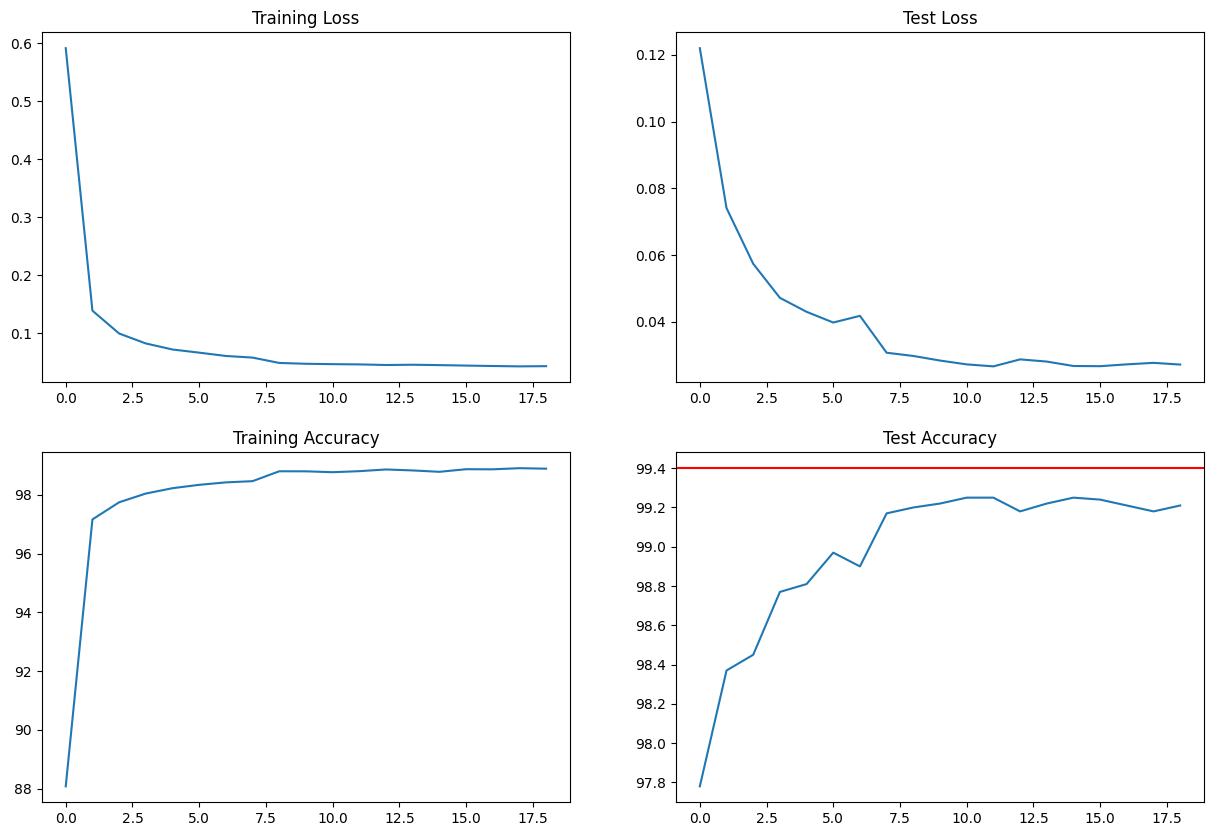

In [9]:
plot_statistics(train_losses, train_acc, test_losses, test_acc)